In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from typing import Union, Tuple

Lets have a first look on the data and analyse some basic properties plus obvious trends.

At first read in the data and look at the dataframe. This is one of the training samples for the competition. The input samples looks like this.

In [14]:
sample_input_csv = "data/train/input_2023_w01.csv"
sample_output_csv = "data/train/output_2023_w01.csv"

In [15]:
sample_input_df = pd.read_csv(sample_input_csv)
sample_input_df.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


The output samples exist for the training process and looks like the following.

In [16]:
sample_output_df = pd.read_csv(sample_output_csv)
sample_output_df.head()

,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56


We can differ between data categories. First category for me would be the identifier block with game_id, play_id, nfl_id and frame_id. The forecast should foresee the specific player (nfl_id) position in a specific frame (frame_id) during a specific play (play_id) in a specific game (game_id). So this information is part of the output as well.

Other blocks could be player information, like player name, player height, player birth date etc. or the movement tracking like x- and y-position or acceleration and orientation. Check the official description for further information. (https://www.kaggle.com/competitions/nfl-big-data-bowl-2026-prediction/data)

In [17]:
print(sample_input_df.columns.tolist())

['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y']


Lets reduce the dataset to an atomar part and use only one sample, which we would like to predict in the future.

In [18]:
zay_df = sample_input_df[sample_input_df['player_name'] == 'Zay Flowers'].copy()
if len(zay_df) == 0:
    print("No data found for Zay Flowers.")
    raise ValueError
else:
    zay_nfl_id = zay_df['nfl_id'].iloc[0]
    print(f"The NFL ID of Zay Flowers is {zay_nfl_id}: {(zay_df['nfl_id'] == zay_nfl_id).all()}")

The NFL ID of Zay Flowers is 55886: True


As I am a Baltimore Ravens fanboy **Zay Flowers** is the player which I will pick in a random play and game.

We need to find a play where Zay Flowers was the targeted receiver to get a overview. With the game id and the play id plus nfl id we can find the corresponding data in the output csv.

In [19]:
zay_predict_df = zay_df[zay_df['player_to_predict'] == True]
if len(zay_predict_df) != 0:
    predict_row = zay_predict_df.iloc[0]
    game_id = predict_row['game_id']
    play_id = predict_row['play_id']
    print(f"game_id: {game_id}, play_id: {play_id}")
else:
    print('No play with zay as targeted receiver.')
    raise ValueError()


game_id: 2023091001, play_id: 407


With the filter values nfl_id, game_id and play_id we can extract the corresponding data from the original dataframe.

In [20]:
filtered_input_df = sample_input_df[
    (sample_input_df['game_id'] == game_id) &
    (sample_input_df['play_id'] == play_id) &
    (sample_input_df['nfl_id'] == zay_nfl_id)
].copy()
filtered_input_df

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
36533,2023091001,407,True,55886,1,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.20,18.47,0.00,0.00,296.45,130.94,11,81.330002,7.56
36534,2023091001,407,True,55886,2,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.19,18.47,0.00,0.00,252.04,133.23,11,81.330002,7.56
36535,2023091001,407,True,55886,3,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.19,18.45,0.00,0.00,233.97,135.92,11,81.330002,7.56
36536,2023091001,407,True,55886,4,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.18,18.44,0.04,0.82,210.74,141.38,11,81.330002,7.56
36537,2023091001,407,True,55886,5,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.17,18.43,0.19,1.83,209.73,147.79,11,81.330002,7.56
36538,2023091001,407,True,55886,6,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.15,18.38,0.65,3.35,208.49,152.96,11,81.330002,7.56
36539,2023091001,407,True,55886,7,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.10,18.28,1.19,4.06,206.93,152.96,11,81.330002,7.56
36540,2023091001,407,True,55886,8,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,80.03,18.11,1.81,4.46,203.12,152.96,11,81.330002,7.56
36541,2023091001,407,True,55886,9,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,79.95,17.91,2.33,4.21,202.13,158.21,11,81.330002,7.56
36542,2023091001,407,True,55886,10,right,82,Zay Flowers,5-10,172,...,Targeted Receiver,79.88,17.63,2.90,4.02,198.09,163.34,11,81.330002,7.56


We also need to extract the corresponding information from the output dataframe to get an overview of the whole play.

In [21]:
filtered_output_df = sample_output_df[
    (sample_output_df['game_id'] == game_id) &
    (sample_output_df['play_id'] == play_id) &
    (sample_output_df['nfl_id'] == zay_nfl_id)
].copy()
filtered_output_df

,game_id,play_id,nfl_id,frame_id,x,y
3673,2023091001,407,55886,1,79.56,13.00
3674,2023091001,407,55886,2,79.62,12.44
3675,2023091001,407,55886,3,79.70,11.88
3676,2023091001,407,55886,4,79.81,11.30
3677,2023091001,407,55886,5,79.91,10.74
3678,2023091001,407,55886,6,80.03,10.17
3679,2023091001,407,55886,7,80.18,9.60
3680,2023091001,407,55886,8,80.34,9.03
3681,2023091001,407,55886,9,80.50,8.47
3682,2023091001,407,55886,10,80.68,7.91


The orientation of the player (o) and the direction of the player movement (dir) is in degree and does not convert easy into the matplotlib plot. Therefore we have to write some code, which preprocesses the angle values.

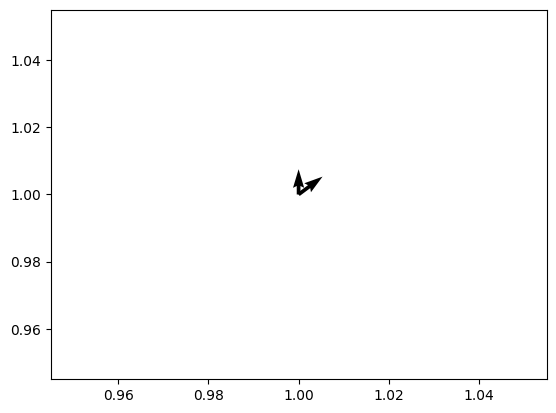

In [22]:

def deg2arrowPosition(angles: Union[float, np.ndarray, pd.Series]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Convert angle(s) in degrees to arrow components (dx, dy).
    Accepts scalar, numpy array or pandas Series. Returns two numpy arrays.
    """
    theta = np.deg2rad(angles)
    dx = np.sin(theta)
    dy = np.cos(theta)
    return np.asarray(dx), np.asarray(dy)

test_dx, test_dy = deg2arrowPosition(45)
plt.quiver([1, 1], [1, 1], [0, test_dx], [1, test_dy], angles='xy', scale_units='xy')
plt.show()

Now we have the filtered dataframe and a function to preprocess the angle values. Now we can plot one play and get a feeling, which information is crucial for the later prediction.

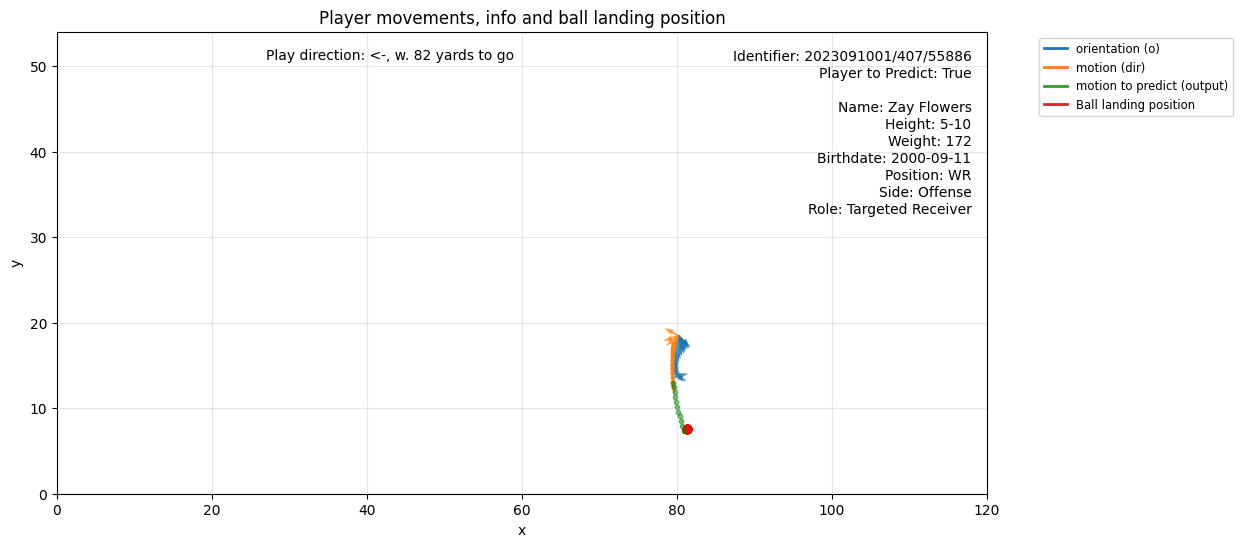

In [23]:
plt.figure(figsize=(12, 6))

plt.xlim(0, 120)
plt.ylim(0, 54)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Player movements, info and ball landing position')
plt.grid(True, alpha=0.3)

dx_o, dy_o = deg2arrowPosition(filtered_input_df['o'])
plt.quiver(filtered_input_df['x'], filtered_input_df['y'], dx_o, dy_o,
           angles='xy', scale_units='xy', scale=0.5,
           color='C0', alpha=0.8, width=0.002)

dx_dir, dy_dir = deg2arrowPosition(filtered_input_df['dir'])
plt.quiver(filtered_input_df['x'], filtered_input_df['y'], dx_dir, dy_dir,
           angles='xy', scale_units='xy', scale=0.5,
           color='C1', alpha=0.8, width=0.002)

# add a legend using proxy artists
legend_elements = [
    Line2D([0], [0], color='C0', lw=2, label='orientation (o)'),
    Line2D([0], [0], color='C1', lw=2, label='motion (dir)'),
    Line2D([0], [0], color='C2', lw=2, label=f'motion to predict (output)'),
    Line2D([0], [0], color='C3', lw=2, label=f'Ball landing position')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.scatter(filtered_input_df['ball_land_x'], filtered_input_df['ball_land_y'], c='red')
plt.scatter(filtered_output_df['x'], filtered_output_df['y'], c='green', alpha=0.5, s=10)

if len(filtered_input_df) != 0:
    info_row = filtered_input_df.iloc[0]
else:
    raise ValueError
plt.text(118, 52, f"Identifier: {info_row['game_id']}/{info_row['play_id']}/{info_row['nfl_id']}", ha='right', va='top')
plt.text(118, 50, f"Player to Predict: {info_row['player_to_predict']}", ha='right', va='top')
plt.text(118, 46, f"Name: {info_row['player_name']}", ha='right', va='top')
plt.text(118, 44, f"Height: {info_row['player_height']}", ha='right', va='top')
plt.text(118, 42, f"Weight: {info_row['player_weight']}", ha='right', va='top')
plt.text(118, 40, f"Birthdate: {info_row['player_birth_date']}", ha='right', va='top')
plt.text(118, 38, f"Position: {info_row['player_position']}", ha='right', va='top')
plt.text(118, 36, f"Side: {info_row['player_side']}", ha='right', va='top')
plt.text(118, 34, f"Role: {info_row['player_role']}", ha='right', va='top')

play_direction_symbol = '<-' if info_row['play_direction'] == 'right' else '->' 
plt.text(59, 52, f"Play direction: {play_direction_symbol}, w. {info_row['absolute_yardline_number']} yards to go", ha='right', va='top')
plt.show()

Extract the visualization code in a separate py file to reuse the code for example in the evaluation process.

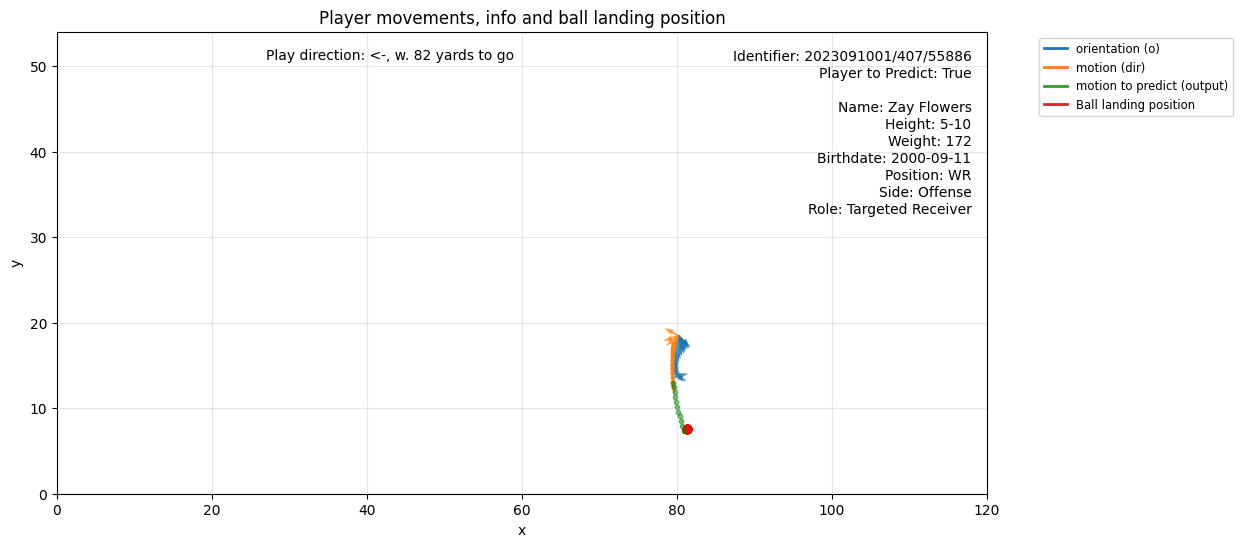

In [24]:
from visualization import plot_single_player

plot_single_player(filtered_input_df, filtered_output_df)